# Ormat Technologies Inc.

Vincent Salinas <br>
Computer Science <br>
UCSD <br>

## Modules

In [12]:
# Imports
from tkinter import *
import matplotlib.pyplot as plt

from scipy import stats
from math import sqrt

# Standard libraries used with Python
import numpy as np
import pandas as pd

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Import dataset


In [13]:
# The code below uses pandas library to import the dataset. This provides data manipulation and analyzation.
df = pd.read_csv('SH temp.csv')
df.columns = ['time','temp']
df # Display dataset

,time,temp
0,1/1/18 0:01,4.120663
1,1/1/18 0:30,4.151361
2,1/1/18 1:00,4.220182
3,1/1/18 1:30,4.309535
4,1/1/18 2:00,4.398887
5,1/1/18 2:30,4.367211
6,1/1/18 3:00,4.325695
7,1/1/18 3:30,4.279080
8,1/1/18 4:00,4.212034
9,1/1/18 4:30,4.144987


## Data Cleaning


In [14]:
# To analyze the dataset, exclude any "n/a" elements. Our data cannot be analyzed correctly 
# with missing data. Excluding them insures no erroneous data is included, while maintaining
# all significant data.
df = df.dropna()
df.isnull().values.any()

False

In [15]:
df['time'].isnull().values.any()

False

In [16]:
df['temp'].isnull().values.any()

False

In [17]:
time = []
for x in range(len(df['temp'])):
    time.append(x)

## Data Visualization
The code below allows us to visualize our dataset. From here we can develop hypotheses and make predictions
as to what might be causing temparture spikes.

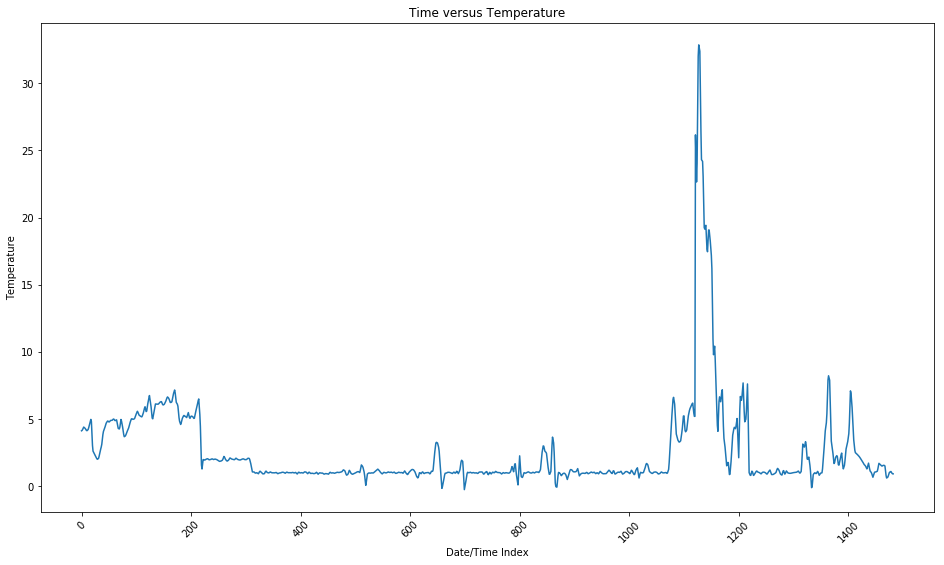

In [18]:
plt.plot(time,df['temp'])
plt.xticks(rotation=45)
plt.title('Time versus Temperature')
plt.xlabel('Date/Time Index')
plt.ylabel('Temperature')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

To better work with the data, the provided dates/times have been converted to indexes. This
makes it easier to read in the plot above. Python widgets is used later to convert indexes back to date/time.

In [19]:
list1 = df['time'].tolist()
list2 = df['temp'].tolist()

In [ ]:
def upper_bounded(x):
    if x >= 5.0 and x <= 7.5:
    

def lower_bounded():

In [ ]:
# The code below using "ipywidgets" library. This allows us to use a GUI to manipulate and analyze data as we want much
# more easily than manually inputting test data.

def direction():
    curr = w1.get()
    if (curr - (curr - 1)) > 0:
        temp1 = list2[w1.get()]
        temp2 = list2[w1.get() - 1]
        print(temp1)
        print(temp2)
        direction = temp1 - temp2
        return(direction)
    else:
        print("Invalid.")

def show_direction():
    d = direction()
    print(d)
    if (d > 2.0):
        print("Abnormal")
    elif (d < 2.0):
        print("DEC")
    else:
        print("SAME")

def get_indeces():
    start = e1.get() + " " + e2.get()
    stop =  e3.get() + " " + e4.get()
    ind1 = list1.index(start)
    ind2 = list1.index(stop)
    return(ind1, ind2)

# Calculates the average temperature from a designated "start" and "stop" date, including
# time in hours:minutes.
def show_mean_temp():
    ind1, ind2 = get_indeces()
    total = sum(list2[ind1:ind2])
    mean = total / len(list2[ind1:ind2])
    print("Average temp: %s" % mean)

# Determine maximum tempurature in designated time span (from "start" to "stop" date, including hours:minutes)
def show_max_temp():
    ind1, ind2 = get_indeces()
    print("Max temp: %s" % max(list2[ind1:ind2]))

# Show current temperature at desiganted "index".
def show_temp():
    print("Current temp: %s" % list2[int(e5.get())])
    
# Show current date at designated "index".
def show_date():
    print("Date: %s" % list1[int(e5.get())])
    
# Shows the current "Start Date" and "End Date" as well as their respective times (h:m)    
def show_entry_fields():
    print("Start Date: %s\nStart Time: %s\nEnd Date: %s\nEnd Time: %s" % (e1.get(), e2.get(), e3.get(), e4.get()))

# Shows date of specified heat
def show_date_of_specified_heat():
    ind1, ind2 = get_indeces()
    maximum = max(list2[ind1:ind2])
    index = list2.index(maximum)
    print("Date: %s Index: %s" % (list1[int(index)], index))
    

def show():
    print(list1[w1.get()])
    print(list2[w1.get()])
    

    
master = Tk()
root = Tk()
Label(master, text="Start Date").grid(row=0, column=0)
Label(master, text="Time").grid(row=0, column=2)
Label(master, text="End Date").grid(row=1, column=0)
Label(master, text="Time").grid(row=1, column=2)
Label(master, text="Index").grid(row=2, column=0)
Label(master, text="Heat").grid(row=2, column=2)

w1 = Scale(root, from_=0, to=len(df['time'])-1, length=1000, tickinterval=200, orient=HORIZONTAL)
w1.set(0)
w1.grid(row=0, column=0)

e1 = Entry(master) # start date entry
e2 = Entry(master) # start time entry
e3 = Entry(master) # end date entry 
e4 = Entry(master) # end time entry
e5 = Entry(master) # time index
e6 = Entry(master) # return date of specified heat

# defaults values 
e1.insert(10,"1/1/18")
e2.insert(10,"0:30")
e3.insert(10,"1/31/18")
e4.insert(10,"23:59")
e5.insert(10,"0")
e6.insert(10,"0.0")

e1.grid(row=0, column=1) # start date
e2.grid(row=0, column=3) # start time
e3.grid(row=1, column=1) # end date
e4.grid(row=1, column=3) # end time
e5.grid(row=2, column=1) # time index
e6.grid(row=2, column=3) # heat value -> Date

Button(master, text='Quit', command=master.quit).grid(row=5, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=5, column=1, sticky=W, pady=4)
Button(master, text='Mean', command=show_mean_temp).grid(row=5, column=2, sticky=W, pady=4)
Button(master, text='Temp', command=show_temp).grid(row=5, column=3, sticky=W, pady=4)
Button(master, text='Date/Time', command=show_date).grid(row=6, column=1, sticky=W, pady=4)
Button(master, text='Max', command=show_max_temp).grid(row=6, column=2, sticky=W, pady=4)
Button(master, text='RTD', command=show_date_of_specified_heat).grid(row=6, column=3, sticky=W, pady=4)
Button(master, text='Dire', command=show_direction).grid(row=7, column=1, sticky=W, pady=4)

Button(root, text='Show', command=show).grid(row=0, column=1, sticky=W, pady=4)


mainloop( )

32.867252
32.016384
0.8508679999999984
DEC
28.019252
24.02212
3.9971320000000006
Abnormal


def bounded(x):
    if (x >= 5.0 and x <= 7.5):
        return(x)
    
def get_ci():
    mean = dff.mean()
    # evaluate sample variance by setting delta degrees of freedom (ddof) to
    # 1. The degree used in calculations is N - ddof
    stddev = stats.sem(dff, ddof=1)
    # Get the endpoints of the range that contains 95% of the distribution
    t_bounds = stats.t.interval(0.95, len(dff) - 1)
    # sum mean to the confidence interval
    ci = [mean + critval * stddev / sqrt(len(dff)) for critval in t_bounds]
    print("Mean: %f" % mean)
    print("Confidence Interval 95%%: %f, %f" % (ci[0], ci[1]))
    return(ci[0], ci[1])


dff = pd.DataFrame()
dff = df['temp'].apply(bounded)
dff = dff.dropna()
avg = dff.mean()
#get_ci()
lower, upper = get_ci()
for x in list2:
    if x > upper:
        print("%f - abnormal" % x)




In [39]:
# The code below using "ipywidgets" library. This allows us to use a GUI to manipulate and analyze data as we want much
# more easily than manually inputting test data.

def get_indeces():
    start = e1.get() + " " + e2.get()
    stop =  e3.get() + " " + e4.get()
    ind1 = list1.index(start)
    ind2 = list1.index(stop)
    return(ind1, ind2)

# Calculates the average temperature from a designated "start" and "stop" date, including
# time in hours:minutes.
def show_mean_temp():
    ind1, ind2 = get_indeces()
    total = sum(list2[ind1:ind2])
    mean = total / len(list2[ind1:ind2])
    print("Average temp: %s" % mean)

# Determine maximum tempurature in designated time span (from "start" to "stop" date, including hours:minutes)
def show_max_temp():
    ind1, ind2 = get_indeces()
    print("Max temp: %s" % max(list2[ind1:ind2]))

# Show current temperature at desiganted "index".
def show_temp():
    print("Current temp: %s" % list2[int(e5.get())])
    
# Show current date at designated "index".
def show_date():
    print("Date: %s" % list1[int(e5.get())])
    
# Shows the current "Start Date" and "End Date" as well as their respective times (h:m)    
def show_entry_fields():
    print("Start Date: %s\nStart Time: %s\nEnd Date: %s\nEnd Time: %s" % (e1.get(), e2.get(), e3.get(), e4.get()))

# Shows date of specified heat
def show_date_of_specified_heat():
    ind1, ind2 = get_indeces()
    maximum = max(list2[ind1:ind2])
    index = list2.index(maximum)
    print("Date: %s" % list1[int(index)])

def show():
    print(list1[w1.get()])
    print(list2[w1.get()])
    

    
master = Tk()
root = Tk()
Label(master, text="Start Date").grid(row=0, column=0)
Label(master, text="Time").grid(row=0, column=2)
Label(master, text="End Date").grid(row=1, column=0)
Label(master, text="Time").grid(row=1, column=2)
Label(master, text="Index").grid(row=2, column=0)
Label(master, text="Heat").grid(row=2, column=2)

w1 = Scale(root, from_=0, to=len(df['time'])-1, length=500, tickinterval=200, orient=HORIZONTAL)
w1.set(0)
w1.grid(row=0, column=0)

e1 = Entry(master) # start date entry
e2 = Entry(master) # start time entry
e3 = Entry(master) # end date entry 
e4 = Entry(master) # end time entry
e5 = Entry(master) # time index
e6 = Entry(master) # return date of specified heat

# defaults values 
e1.insert(10,"1/1/18")
e2.insert(10,"0:30")
e3.insert(10,"1/31/18")
e4.insert(10,"23:59")
e5.insert(10,"0")
e6.insert(10,"0.0")

e1.grid(row=0, column=1) # start date
e2.grid(row=0, column=3) # start time
e3.grid(row=1, column=1) # end date
e4.grid(row=1, column=3) # end time
e5.grid(row=2, column=1) # time index
e6.grid(row=2, column=3) # heat value -> Date

Button(master, text='Quit', command=master.quit).grid(row=5, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=5, column=1, sticky=W, pady=4)
Button(master, text='Mean', command=show_mean_temp).grid(row=5, column=2, sticky=W, pady=4)
Button(master, text='Temp', command=show_temp).grid(row=5, column=3, sticky=W, pady=4)
Button(master, text='Date/Time', command=show_date).grid(row=6, column=1, sticky=W, pady=4)
Button(master, text='Max', command=show_max_temp).grid(row=6, column=2, sticky=W, pady=4)
Button(master, text='RTD', command=show_date_of_specified_heat).grid(row=6, column=3, sticky=W, pady=4)

Button(root, text='Show', command=show).grid(row=0, column=1, sticky=W, pady=4)


mainloop( )

## Data Analysis

### Goal:
Want to predict when next critical level (temperature spike) will happen.

### Methodology:
Designate stable and unstable states. These are temperature thresholds that are pre-designated to be the maximum or minimum level of heat considered to be acceptable or safe. Designate unstable period. This is the length of time (hours/minutes) that is pre-designated to be the maximum length of time considered to be acceptable or safe.

Determine how long average temperature remains in unstable state. If average temperature remains in unstable state for unstable period or longer, critical level may occur.



### Formulation
time = length of time, starting when temperature reaches unstable threshold <br>
temp = average temperature <br>
cx_min = 0 <br>
cx_max = maximum length of the time considered to be acceptable or safe while in unstable state <br>
cy_min = lower bound for unstable state <br>
cy_max = upper bound for unstable state <br>

#### if ((temp < cy_min) OR (temp > cy_max)) AND (time > cx_max) --> temperature spikes likely <br>

### Conclusion
From the given data plot above, a temperature spike at (32.867252) occurs on 1/24/18 14:29. To make a prediction of when this would have likely occured, we may look at the average temperature and length of time before the spike. The plot above shows temperatures in the unstable state from indexes ~1100 to ~1120, dates and times 1/23/18 21:59 to 1/24/18 7:59, respectively. This is a length of time of ~10 hours. The mean temperature in this time was 5.2294484. Given a pre-desiganted thresholds for unstable state and unstable period, if 5.2294484 > (unstable state) AND ~10 > (unstable period), we can predict that a critical level (temperature spike) is likely to happen. 

Given the dataset with designated dates and temperatures alone, I feel this is the best approach to solving the problem of forecasting temperature spikes and their likelihood. As far as the relationship between days and temperatures though, the two are completely independent. No indication can be made on the temperatures alone, given the time and day. A better prediction as to "why" these temperature spikes occur will certainly require more data, such as materials used in the machinery maintaining heat levels, or routine and preventative maintenance, etc.

### Limitations: 
From the given dataset, there is only one instance of temperatures in the unstable state before reaching critical levels. To more accurately predict temperature spikes, we can better solidify the methodology above using larger datasets where we can analyze a larger number of these instances. Doing so can allow us to set a much more accurate threshold for unstable temperatures and periods before temperatures reach critical levels.

In [30]:
threshold = np.array(4.0)

## Why Python?

In terms of structure and syntax, Python is not only free, intuitive, and extensible but also an exceedingly powerful general-purpose programming language.<br>
<br>
Python was explicitly designed (a) so code written in Python would be easy for humans to read, and (b) to minimize the amount of time required to write code. According to a recent study, 80% of the top 10 CS programs in the country use Python in their intro to computer science classes. Python also provides a number of imports and libraries that make manipulation and analyzing datasets relatively easy, which are also free and updated frequently. The following are just a few aspects of why Python is excellent for data analysis:<br> 

Usability: <br>
Coding and debugging is easier to do in Python, mainly because of the "nice" syntax. <br>
<br>
Flexibility: <br>
Python is flexible for doing new things. Developers can also use it for scripting a website or other applications. <br>
<br>
Ease of Learning:<br>
Python's focus on readability and simplicity makes that its learning curve is relatively low and gradual.<br>

## Modules

Pandas: <br>
Pandas is the Python Data Analysis Library, used for everything from importing data from Excel spreadsheets to processing sets for time-series analysis. Pandas puts pretty much every common data munging tool at your fingertips. This means that basic cleanup and some advanced manipulation can be performed with Pandas’ powerful dataframes.<br>

Numpy: <br>
Pandas is built on top of NumPy, one of the earliest libraries behind Python. NumPy’s functions are exposed in Pandas for advanced numeric analysis.<br>

Matplotlib: <br>
Plotting is an essential component of data analysis. Matplotlib uses simple plots to understand complex data sets and to help others understand them. I can be used in in conjunction with Pandas library to make bar charts (including histograms), line plots (including time series), scatter plots, and desnity plots. <br>

ipywidgets: <br>
Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc. You can use widgets to build interactive GUIs for your notebooks. You can also use widgets to synchronize stateful and stateless information between Python and JavaScript.
